# Data Mining Lab 2

### Student Information
Name:  余頡

Student ID:  109136503

GitHub ID:  knjo5566 ,  20663759

Kaggle name: KNJO

Kaggle private scoreboard snapshot: 

[Snapshot](pics/kaggle.png)


### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

---
# First Part

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
## >>> Exercise 1 (Take home): 
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


In [5]:
import numpy as np

## fuction to create a array for frequency
def count_frequency( counts ):
    term_frequencies = []
    for j in range(0,counts.shape[1]):
        term_frequencies.append(sum(counts[:,j].toarray()))
    term_frequencies = np.asarray(counts.sum(axis=0))[0]
    return term_frequencies

In [6]:
## fuction to sort word dataframe
def sort_data(count_vect , sort_data):
    ## tokenize the text 
    df_counts = count_vect.fit_transform(sort_data.text)
    
    ## creat a dataframe of wold and frequency 
    df_sort = pd.DataFrame(count_vect.get_feature_names() , columns= ['words'] )
    df_sort['frequency'] = count_frequency(df_counts)[0:len(df_sort)]
    
    ## sort the data by frequency 
    df_sort.sort_values(by='frequency' , ascending=False, axis =0 , inplace=True)
    return df_sort

In [7]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

train_sort = sort_data(count_vect , train_df)
print ("Top 30 world in training data : \n" ,train_sort[0:30] , "\n")

test_sort = sort_data(count_vect , test_df)
print ("Top 30 world in testing data : \n" ,test_sort[0:30])

Top 30 world in training data : 
       words  frequency
8930    the       1736
9119     to       1289
537     and        955
10051   you        796
6371     of        793
4546     is        787
4571     it        717
4383     in        626
8924   that        537
5957     my        535
3391    for        446
6422     on        390
976      be        383
5577     me        380
9020   this        350
8264     so        328
4009   have        312
6235    not        303
4798   just        301
1448    but        293
9872   with        288
757      at        269
1504    can        257
464     all        243
5186   like        243
670     are        231
10059  your        229
9678    was        228
9782   when        226
4319     if        216 

Top 30 world in testing data : 
      words  frequency
1687   the        153
1739    to        138
99     and         92
1240    of         83
909     it         83
1938   you         82
903     is         77
867     in         69
655    for         5

---
## >>> Exercise 2 (Take home): 
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## instantiate vectorizer with feature 1000
TF_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

In [9]:
## use TfidfVectorizer, which is the equivalent of CountVectorizer followed by TfidfTransformer
train_df_TF_1000 = TF_vectorizer.fit_transform(train_df['text'])
feature_names = TF_vectorizer.get_feature_names()
print ("Feature name of training dat : " ,feature_names[100:110])

Feature name of training dat :  ['awareness', 'away', 'awe', 'awesome', 'awful', 'b', 'baby', 'back', 'bad', 'ball']


---
##  >>> Exercise 3 (Take home): 
Can you interpret the results above? What do they mean?

### What is the result above?

The plot above is the confusion matrix be ploted with certain color pattern.


### What do they mean?

We can observe the x & y label. X laber is `True`, implies what the emotion of the text actually is. On the other hand, Y label, `predicted` shows the predicted emotion. So, only the center parts (the `predicted` class is same to `true` class) are correct prediction.

By the number on the plot, We can first see that the testing data predicted correctly are major, and we can know the recall rate and precision by line and row. And we can soon find out that the fear part be predicted more than other emotion. This is due to the data imbalance, the fear class is more than other three, so it's normal that we get a imbalance result.

---
##  >>> Exercise 4 (Take home):  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 
# apply analyzer to training data, so that the testing data will be vectorized by vectors in training data 
BOW_500.fit(train_df['text'])

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [11]:
## build Naive Bayes model and training
NB_model = MultinomialNB()
NB_model.fit(X_train,y_train)

## predict
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

In [12]:
## get the predicted result. 
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)),"\n")

print(classification_report(y_true=y_test, y_pred=y_test_pred))

training accuracy: 0.79
testing accuracy: 0.69 

              precision    recall  f1-score   support

       anger       0.65      0.65      0.65        84
        fear       0.72      0.77      0.75       110
         joy       0.76      0.70      0.73        79
     sadness       0.63      0.62      0.63        74

    accuracy                           0.69       347
   macro avg       0.69      0.69      0.69       347
weighted avg       0.70      0.69      0.69       347



In [13]:
cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 15  5  9]
 [ 8 85  5 12]
 [10  8 55  6]
 [11 10  7 46]]


---
## >>> Exercise 5 (Take home): 

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Differences between two model 

1. The accuracy score of `training` data is hugely different, DT model is better than NB model.
2. Some how the perfomance (precision & recall) shows that NB model is better.

### My opinions
1. The branch on Decision Tree is decide by the value of certain vector(feature), it will take a risk of `overfitting` if the feature has no actual correlation with outcome, or the training data and testing data is bias.
2. NB model predicts the result by computing the maximum likehood, so it will get the result by sum up all the posterior probabilty of words, in this method, the model has higher variance and lower bias. 
3. NB model has more robustness to outlier and high dimension data compare to DT model. The practicality of DT model will reduce rapidly as dimension going higher, and it's so call `curse of dimension`, the DT model make a prediction by just several features in such high dimension data. 

---



###  Deal with categorical label (y)


In [14]:
import keras
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

###  Build model

In [15]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

input_shape = X_train.shape[1]
output_shape = len(label_encoder.classes_)

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32064     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_2 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax_1 (Softmax)          (None, 4)                 0   

###  Train

In [16]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')


Train on 3613 samples, validate on 347 samples
Epoch 1/25
3613/3613 [==============================] - 0s 85us/step - loss: 1.3354 - accuracy: 0.3460 - val_loss: 1.2787 - val_accuracy: 0.4582
Epoch 2/25
3613/3613 [==============================] - 0s 42us/step - loss: 1.0234 - accuracy: 0.6366 - val_loss: 0.9404 - val_accuracy: 0.6657
Epoch 3/25
3613/3613 [==============================] - 0s 39us/step - loss: 0.6092 - accuracy: 0.7855 - val_loss: 0.7658 - val_accuracy: 0.7147
Epoch 4/25
3613/3613 [==============================] - 0s 39us/step - loss: 0.4345 - accuracy: 0.8378 - val_loss: 0.7488 - val_accuracy: 0.7118
Epoch 5/25
3613/3613 [==============================] - 0s 39us/step - loss: 0.3425 - accuracy: 0.8840 - val_loss: 0.7889 - val_accuracy: 0.6974
Epoch 6/25
3613/3613 [==============================] - 0s 39us/step - loss: 0.2801 - accuracy: 0.9037 - val_loss: 0.8349 - val_accuracy: 0.6974
Epoch 7/25
3613/3613 [==============================] - 0s 38us/step - loss: 0.235

###  Predict on testing data

In [17]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)

## import the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")

---
##  >>> Exercise 6 (Take home):  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

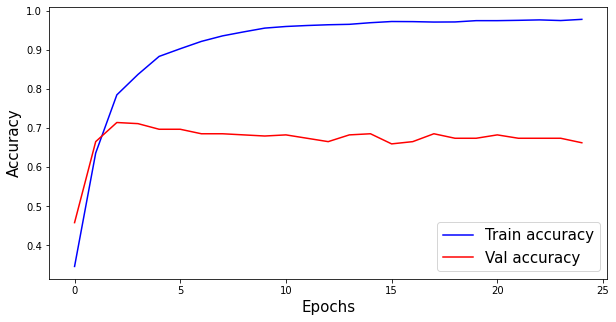

In [18]:
import matplotlib.pyplot as plt

## set up figure size
plt.figure(figsize = (10,5))
plt.plot(training_log['accuracy'], color = 'b',label = "Train accuracy")
plt.plot(training_log['val_accuracy'], color = 'r' ,label = "Val accuracy")
plt.xlabel("Epochs", fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend(loc='best',fontsize =15)
plt.show()

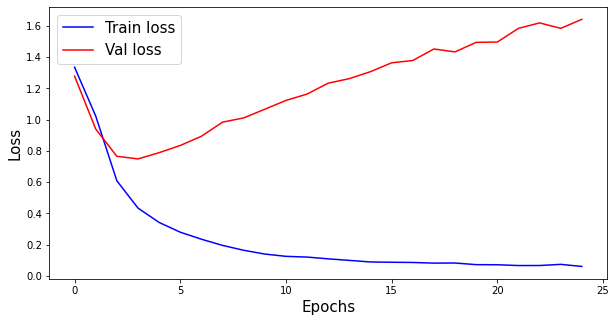

In [19]:
plt.figure(figsize = (10,5))
plt.plot(training_log['loss'], color = 'b',label = "Train loss")
plt.plot(training_log['val_loss'], color = 'r' ,label = "Val loss")
plt.xlabel("Epochs", fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.legend(loc='best',fontsize =15)
plt.show()

### How do i interpret the plot above ?

By the label we know the plots are accuarcy and loss trend as Epochs increasing. And the data is come from the `training log` which recoded the score in each epoch.

### How are they related to the concept of overfitting/underfitting covered in class?

+ We first observed the `accuracy` plot :  Accuracy increase rapidly in the begining. Then the curve go smooth, accuracy of training data is close to `0.97`, but testing only `0.65` and even decline a little bit. 
    - The begin decline is because the model train well after several Epochs. The model find better network assemblance, and the previous part with low accuary is  **underfittiing**. 
    - The reason why training accuary can not converge to almost `1` is because the **noise**, which make the prediction have certain uncertainty. 
    - This **gap** between training and testing data is because the insufficient train data, it can represent the whole data set, and it's so call **bias of data set**.


+ We then observed the `loss` plot : Loss decline rapidly in the begining. Then the loss of training data go smooth, however,  the testing one grow abruptly. 
    - The begin high loss is because the model didn't train well (underfitting).
    - The reason why the `loss` part grow up is our model trained to fit the training data too much, for example, some node inside the network might increase the performance of training data set. But, as i mention above, data hardly is unbias, so, the model be train too well to fit the training data, **even the noise and the bias**, and this is so call **overfitting**. In the result, this overfitting part turn out to be the error / loss.

---

###  Prepare training corpus

In [20]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

## create the training corpus
training_corpus = train_df['text_tokenized'].values

###  Training our model

In [21]:
from gensim.models import Word2Vec

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
579,10579,@BIGGKATZ BUT arms (focused rage) is overpower...,"[@, BIGGKATZ, BUT, arms, (, focused, rage, ), ..."
1133,20276,@iSmashFizzle that's me all the time. I carry ...,"[@, iSmashFizzle, that, 's, me, all, the, time..."
881,20024,Ever been really lonely and your phone keeps b...,"[Ever, been, really, lonely, and, your, phone,..."
1633,20776,Good start to the day I forgot to set my #alar...,"[Good, start, to, the, day, I, forgot, to, set..."
3217,40390,@greencapt there's something to note in the fa...,"[@, greencapt, there, 's, something, to, note,..."


In [22]:
## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

###  Generating word vector (embeddings)

In [23]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']

# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

[('blessing', 0.940865159034729),
 ('See', 0.9390803575515747),
 ('abscess', 0.9342108368873596),
 ('.\\nA', 0.9326569437980652),
 ('nappy', 0.9302854537963867),
 ('birthday', 0.9295462369918823),
 ('pls', 0.9294005632400513),
 ('Really', 0.9267424941062927),
 ('happier', 0.9261310696601868),
 ('free', 0.9257444143295288)]

---
## >>> Exercise 7 (Take home): 

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


### What would i do :
As the above programing and output, we can get relation between words. So, to utilize the vector to predict the sentence. Maybe I can sum up the relation between the predict word and each word in the sentence. 

**example :**
If I want to predict the emtion of the sentence,
I can average all the correlative score of word, and choose the higher one to be predicted outcome. 

In [24]:
## e.g. the relation between school and fear.
print ("coerelation with anger: ", word2vec_model.similarity('school' ,'anger')) 
print ("coerelation with joy : ", word2vec_model.similarity('school' ,'joy')) 


coerelation with anger:  0.9759759
coerelation with joy :  0.92002547


In [25]:
## fuction to compute score of each predicted emotion
def count_score( emotions, token ):
    ## create score list
    score = np.zeros(len(emotions))
    i = 0
    for emotion in emotions :
        for word in token :
            score[i] = score[i] + word2vec_model.similarity(word , emotion)
        i+=1
    return score

In [26]:
## the emotion list I want to predict.
emotion = ['anger','fear','joy','sadness']

## Take the first sentence for demostration
emotion_score =  count_score(emotion , train_df['text_tokenized'][0])
print ("predict sentence : " , train_df['text'][0])
print (emotion_score)

## get the max value index
index = np.argmax (emotion_score,axis=0)
print ("Predicted emotion is :" ,emotion[index])

predict sentence :  How the fu*k! Who the heck! moved my fridge!... should I knock the landlord door. #angry #mad ##
[21.64187586 21.25322172 20.36143824 21.65657753]
Predicted emotion is : sadness


In [27]:
## predict other sentence. Take "I have to work" for example. 
import re
sentence = "I have to work"
## Split sentence into word.
spilt_sentence = re.split('\s+', sentence)

emotion_score =  count_score(emotion , spilt_sentence)
print ("predict sentence : " , sentence)
print (emotion_score)
index = np.argmax (emotion_score,axis=0)
print ("Predicted emotion is :" ,emotion[index])

predict sentence :  I have to work
[3.05526638 2.72933933 2.35229388 2.5400238 ]
Predicted emotion is : anger


By the code above, we can get a predicted emotion of a sentence by other word vectors we have.

---
###  Prepare visualizing target

Let's repare data lists like:
    - happpy words
    - angry words
    - data words
    - mining words

In [28]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


---
###  >>> Exercise 8 (Take home):   

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [29]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

###  Plot using t-SNE (2-dimension)

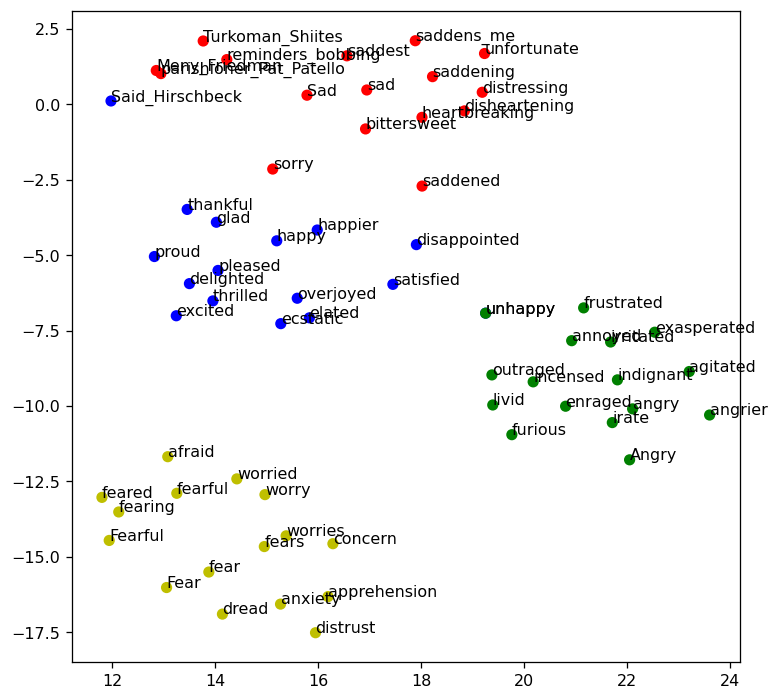

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

###  Plot using t-SNE (3-dimension)

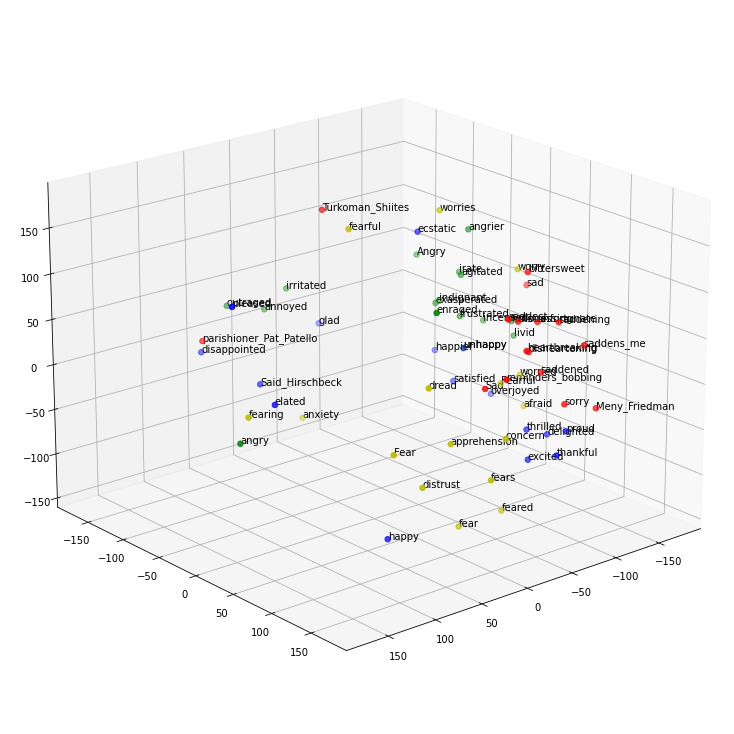

In [32]:
from mpl_toolkits.mplot3d import Axes3D
## t-SNE model, set components to 3 with PCA to be initialtion
tsne = TSNE(n_components=3, init='pca', random_state=0 ,perplexity= 30,n_iter=1000)
## training
X_tsne = tsne.fit_transform(X_train)

## set 3D plot
fig = plt.figure(figsize=(10, 10))

ax = Axes3D(fig)
# add zaxis for the third dimension.
for label, x, y , z in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1],X_tsne[:target_size, 2]):
    ax.text(x,y,z,  '%s' % (label), size=10, zorder=1,  color='k') 
    
ax.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1],X_tsne[:target_size, 2],s =30, c=color)
ax.view_init(20, 50)
plt.show()

### what i observed ?
It's supprise about the result in the 3D-plot with a worse classification. We can saw that in 2D-plot is remarkablely distinguishable, however they mix together when component going up to 3.

### why this happened ?
As the theory of PCA, we know that the components come from the projections in each eigenvector, so the distribution will just get a new value when dimension increase. However, t-SNE do the dimension reduction by probability fuction, it tend to keep the local feature by **transforming the Euclidean distance to probability**, so some intrinsic information is hard to be projected to lower dimension. Meanwhile, when projected dimension increase, we will take a risk to find a local singularity, which might have a worse performance than 2 dimension.

---
# Third Part

### Outliner
I will split my competition report into three parts:
1. Preprocessing
2. Vectorizer
3. Model

## 1. Preprocessing
### 1.1 Load `.json` and `.csv`, and transform `emotion` and `identification` to dictionary.

In [ ]:
# load the .csv
data_identification = pd.read_csv('dm2020-hw2-nthu/data_identification.csv')
emotion = pd.read_csv('dm2020-hw2-nthu/emotion.csv').

# Transform to dic
data_identification_dict = data_identification.set_index('tweet_id').T.to_dict('list')
emotion_dict = emotion.set_index('tweet_id').T.to_dict('list')

# transform json to dataframe by rows.
with open('dm2020-hw2-nthu/tweets_DM.json') as json_file: 
    tweets_DM_list = []
    for line in json_file.readlines():
        data = json.loads(line) 
        tweets_DM_list.append(data)

### 1.2 Make a dataframe with text, id, emotion and identification by fusing the above data.


* To append `emotion` and `identification` into text dataframe, i first rearrange (creat a new)  dataframe of `emotion` and `identification`.

In [ ]:
# creat new list for rearrange data.
emotion_list = []
identification_list = []

# get the tweet id in each rows and append to the list.
for i in range(len(tweets_DM)):
    id_ = tweets_DM['tweet_id'][i]
    identification_list.append(data_identification_dict[id_])
    emotion_list.append(emotion_dict[id_])

# append the rearrange data.
tweets_DM['dataset'] = identification_list
tweets_DM['emotion'] = emotion_list

### 1.3 Remove duplicated and null value. Split the data into training and testing data.

In [ ]:
test_df  = tweets_DM[tweets_DM['dataset'] == 'test' ]
train_df = tweets_DM[tweets_DM['dataset'] == 'train']

### 1.4  Data sampling.
**Traing by the whole traing data** has a better perfomance, but, I use small training data for testing convenience.

Cause i found that `Naive Bayes model` will predict lot of `joy`, and the `rarer emotions` have a **low recall rate**. I tried to sample the same number of data by each emotion. However, I got wores result with a 30% accuracy and a higher recall rate in the `rarer emotions`. So, I used the whole training data for modeling.


In [ ]:
# Small sample for testing.
train_df = tweets_DM[tweets_DM['dataset'] == 'train'].sample(n=50000)

---
## 2. Vectorizer

### What vectorizer I utilized to tokenize the text ?
I test `CountVectorizer` and `Tf-IdfVectorizer`. The performance of `Tf-IdfVector` is better, which is different to the result in lab-1, and the reason of it is because of the data insuffcience. So it's quite normal that `Tf-IdfVector` perform well with in such a huge dataset.

### What did i tried on vectorizer ?
For the concern for the resource of my computer, I first try `max_features = 500` and `1000` in Vectorizer. It's not surprised that `1000` is better than `500`, cause we can evaluate the data by more features. 

Because I constrained the maximun of the vectors (my computer will collapse when using all vectors), I need to make the vectorizer fit the dataset (or the vector in traing data will not match testing data). And I found that fitting the whole dataset can get a little promotion, rather than just fit the training dataset. It's reasonable that the vectors with whole dataset have less bias.

In [ ]:
TF_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
TF_vectorizer.fit(tweets_DM['text'])

---
## 3. Model

### What model did i tried ?

Cause I'm a rookie in machine learning, I hope to utilize the models those are interpretable for me. So I tried `Decision Tree`, `Naive Bayes model`, `RandomForest model` and `SVM model`.

First, `SVM model` did the best job in conclusion. And i will explain the approach I tried.

### 3.1 Decision Tree
Decision tree is the first model i tried, which can get a high training accuracy cause it's easy to overfitting, high-dimensional dataset especially. I got 96% training accuracy with only 22% testing accuracy.

### 3.2 Naive Bayes model
After i tried `Naive Bayes model`, I discovered the perditions are totally different to `Decision Tree`, lots of `joys` compared to `Decision Tree` with somehow balance preditions. Then, i discovered the `emotion` class are highly imbalance. So i tried to sample the training data with same distribution. As i mentioned above, this turned out to be a mess.

According to the theory of `Naive Bayes model` will evaluate the data with features and the posterior probability. So, the ratio of each `emotion` is matter for making the prediction. But it also lead to a low recall rate.

### 3.3 Random Forest model
With the consequence of the above attempt, `Decision Tree` has a higher training accuracy but poor testing accuary due to overfitting. On the other hand, `Naive Bayes model` provide a relatively underfitting approach.

So, I tried `RandomForest model` which can set the `max_depth` to decide how to fit the data. And the vote of the forest can also provide a effect which is similar to posterior probability in `Naive Bayes model`.

**parameter setting** : base on some tree based research, the suggested `depth` is around `log2 (number of attributes * recodes of data)`, so I start from 30, and find that `max_depth = 40` has the best performance. The suggested `estimator` is no need to exceed the square root of `recodes of data`, the bias between each tree would hardly effect the result in these much estimators. And I got a 40% testing accuracy in the below setting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# set the parameter
rfc = RandomForestClassifier(max_depth = 40 , n_estimators = 1000)
rfc.fit(X_train,y_train)

### 3.4 Support Vector Machine
I didn't expect `SVM` result the best performance in the begining, because I though the distribution of each `emotion` is not distinguishable in such high-dimention space (features are not correlate to emotion actually). The theory of `SVM` is to provide a hyper plane to split each class. The vectors (features) decide the plane, and the number of each class will effect the boundary of plane. But the outcome seems that the data is not that unrecognizavle.

And `kernel = 'rbf'` provide a better performance than `linear`. It's due to rbf approach will provide curved boundary which might decide by the recode of each `emotion`, So the overlaping part would be judged more correctly. 

In [ ]:
from sklearn.svm import SVC
# set the parameter
svm = SVC (kernel = 'rbf' , probability = True)
svm.fit(X_train,y_train)

### 3.5 Majority decision of model
Finally, I tried to fuse the result I got form `RandomForest model` and `SVM model`. Base on `SVM kernel = 'rbf'`, and replaced the predicted emotion if `RandomForest model` is same to `SVM kernel = 'linear'`. 

In my first attampt, i got a lower score compare to oringinal one. I was confused about the unexpected result, and I came up with a assumption, **Tree base models have tendency to misjudge the class, if we trained a imbalnce data**. Tree models sometimes used to dectect outliners. It build a tree by the whole data, and the major class, which may distribute everywhere in the hyper space, would be easy to stay in the deeper leaves. Hence, the minor class with neutral features, would be judged to be the major class, and it's some how similar to the posterior probability I noted above. 

For the reason, I tried to constrain the replace emotion that can't be `joy`. Surprisingly, I got the best performance.

In [ ]:
# load each testing result
RF = pd.read_csv('testRF.csv')
SVM = pd.read_csv('testSVMlin.csv')
SVMrbf = pd.read_csv('testSVMrbf.csv')

fuse = []

# replace the emotion, if RF is same to SVM_linear which is not joy
for i in range (len(RF)):
    if SVM['emotion'][i] == RF['emotion'][i] and SVM['emotion'][i] != "joy" :
        fuse.append (SVM['emotion'][i])
    else:
        fuse.append (SVMrbf['emotion'][i])

---
In conclusion, even I didn't get a remarkable competition ranking via using BERT or some specific model for NLP, or run by all vectors. But I tried my best to carry out the competition by integrating my konwledge and what I learned form the course. I thing I got a opportunity to integrate my knowledge and programing. After this competition, I considered I obtained the basic concept of several models and the insight of preprocessing. And it will be a good help in the future when analysing data.

Thanks for your reading.